In [10]:
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [11]:
special_names = ['LR001', 'LR0001', 'LR0001_2k', 'SAGE_LR0001_nodropout']
special_models = [['..'+i.strip('results.npy') for 
                  i in glob.glob('../tensorboard_runs/*'+s+'/*.npy')][0] for s in special_names]

In [12]:
special_models

['../tensorboard_runs/LR001/',
 '../tensorboard_runs/LR0001/',
 '../tensorboard_runs/LR0001_2k/',
 '../tensorboard_runs/SAGE_LR0001_nodropout/']

In [13]:
req_len = 68
models = ['..'+i.strip('results.npy')
             for i in glob.glob('../tensorboard_runs/04-05*/*.npy')]
models.extend(special_models)

run_dicts = [np.load(i+'results.npy', allow_pickle=True).item() 
             for i in models]

idx = [it for it,r in enumerate(run_dicts) if len(r)==req_len]
models=np.array(models)[idx]
run_dicts = np.array(run_dicts)[idx]

model_names = [glob.glob(i+'*_*')[0].split('/')[-1] 
             for i in models]

model_names[-1] = model_names[-1]+special_names[-1]
model_names[-2] = model_names[-2]+special_names[-2]
model_names[-3] = model_names[-3]+special_names[-3]

In [14]:
model_names

['GATConv_GNBR_no_feats',
 'GCNConv_Decagon_feats',
 'SAGEConvMean_Decagon_feats',
 'GATConv_GNBR_feats',
 'HGCNConv_Decagon_feats',
 'GATConv_Decagon_no_feats',
 'SAGEConvMean_GNBR_feats',
 'SAGEConvMean_GNBR_no_feats',
 'GCNConv_GNBR_no_feats',
 'GATConv_Decagon_GNBR_feats',
 'GCNConv_GNBR_feats',
 'SAGEConvMean_Decagon_no_feats',
 'GCNConv_Decagon_no_feats',
 'SAGEConvMean_GNBR_feats',
 'SAGEConvMean_GNBR_featsLR0001',
 'GCNConv_GNBR_featsLR0001_2k',
 'SAGEConvMean_GNBR_featsSAGE_LR0001_nodropout']

In [15]:
f1s = {}
recalls = {}
for i in range(len(run_dicts[0])):
    f1s[i] = []
    recalls[i] = []

for dict_ in run_dicts:
    for k,v in dict_.items():
        f1s[k].append(v[0]['f1'])
        recalls[k].append(v[0]['recall'])

### Comparing results across models

In [16]:
def plot_scatter(df, baseline, ticks, label=None, title=None):
    df['name'] = ticks
    df = df.sort_values('name')
    ticks = df['name'].values
    df = df.drop('name',1)
    
    plt.scatter(x=range(len(df)),y=df.median(1),color='b')
    plt.scatter(x=range(len(df)),y=df.mean(1),color='g')
    plt.plot([0,len(df)],[baseline,baseline],'r')
    plt.ylim([0,0.8])
    plt.xlabel('Models')
    plt.ylabel(label)
    plt.title(title)
    
    plt.xticks(list(range(len(ticks))), ticks, rotation=90)
    plt.legend(['Aggarwal baseline','Median','Mean'])
    

In [19]:
pd.DataFrame(recalls)

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.000000,0.181818,0.000000,0.00000,0.000000,0.000000,0.500000,0.333333,0.000000,0.000000,...,0.333333,0.037037,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.111111,0.400000
1,0.333333,0.636364,1.000000,0.40000,0.200000,1.000000,0.500000,0.000000,1.000000,0.000000,...,0.000000,0.321429,0.500000,1.000000,0.333333,0.500000,0.000000,0.333333,0.300000,0.500000
2,0.000000,0.454545,0.000000,0.40000,0.200000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.000000,0.285714,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.100000,0.300000
3,0.333333,0.454545,1.000000,1.00000,0.000000,1.000000,0.000000,0.333333,1.000000,0.000000,...,0.000000,0.148148,0.500000,0.000000,0.666667,0.000000,1.000000,0.333333,0.111111,0.300000
4,0.333333,0.090909,0.000000,0.20000,0.100000,0.000000,0.500000,0.333333,0.500000,0.000000,...,0.000000,0.321429,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.300000,0.200000
5,0.000000,0.090909,0.000000,0.00000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.050000,0.300000
6,0.000000,0.272727,0.000000,0.20000,0.111111,0.000000,0.000000,0.000000,0.500000,0.500000,...,0.000000,0.148148,0.000000,0.000000,0.666667,0.000000,0.000000,0.333333,0.222222,0.600000
7,0.000000,0.000000,0.000000,0.00000,0.222222,0.000000,0.000000,0.666667,0.000000,0.000000,...,0.000000,0.185185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277778,0.200000
8,0.666667,0.363636,0.000000,0.20000,0.444444,1.000000,1.000000,0.666667,1.000000,0.000000,...,0.333333,0.444444,0.000000,1.000000,0.333333,0.500000,1.000000,1.000000,0.388889,0.700000
9,0.103448,0.128205,0.033333,0.21875,0.138889,0.038462,0.111111,0.100000,0.033333,0.166667,...,0.129032,0.181818,0.166667,0.137931,0.129032,0.241379,0.193548,0.100000,0.085106,0.210526


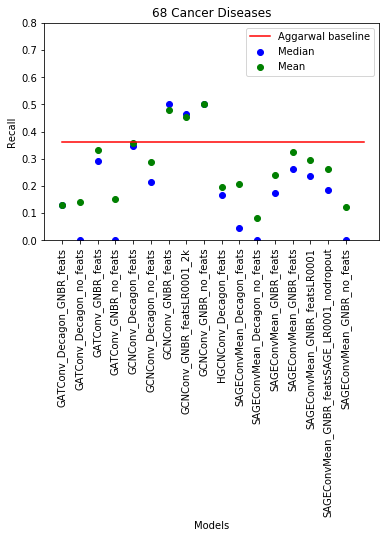

In [17]:
plot_scatter(pd.DataFrame(recalls),0.36, model_names, label='Recall', title='68 Cancer Diseases')

In [18]:
list(zip(range(len(model_names)),model_names))

[(0, 'GATConv_GNBR_no_feats'),
 (1, 'GCNConv_Decagon_feats'),
 (2, 'SAGEConvMean_Decagon_feats'),
 (3, 'GATConv_GNBR_feats'),
 (4, 'HGCNConv_Decagon_feats'),
 (5, 'GATConv_Decagon_no_feats'),
 (6, 'SAGEConvMean_GNBR_feats'),
 (7, 'SAGEConvMean_GNBR_no_feats'),
 (8, 'GCNConv_GNBR_no_feats'),
 (9, 'GATConv_Decagon_GNBR_feats'),
 (10, 'GCNConv_GNBR_feats'),
 (11, 'SAGEConvMean_Decagon_no_feats'),
 (12, 'GCNConv_Decagon_no_feats'),
 (13, 'SAGEConvMean_GNBR_feats'),
 (14, 'SAGEConvMean_GNBR_featsLR0001'),
 (15, 'GCNConv_GNBR_featsLR0001_2k'),
 (16, 'SAGEConvMean_GNBR_featsSAGE_LR0001_nodropout')]

### Comparing same model runs for consistency

In [6]:
recalls_df = pd.DataFrame(recalls).melt()
f1s_df = pd.DataFrame(f1s).melt()

Text(0, 0.5, 'f1s')

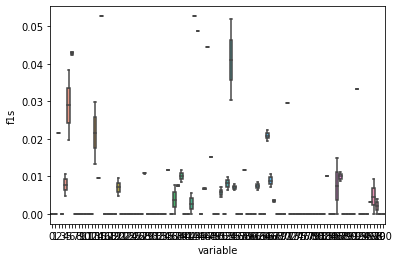

In [7]:
sns.boxplot(data=f1s_df, x='variable', y='value')
plt.ylabel('f1s')

Text(0.5, 0, 'disease')

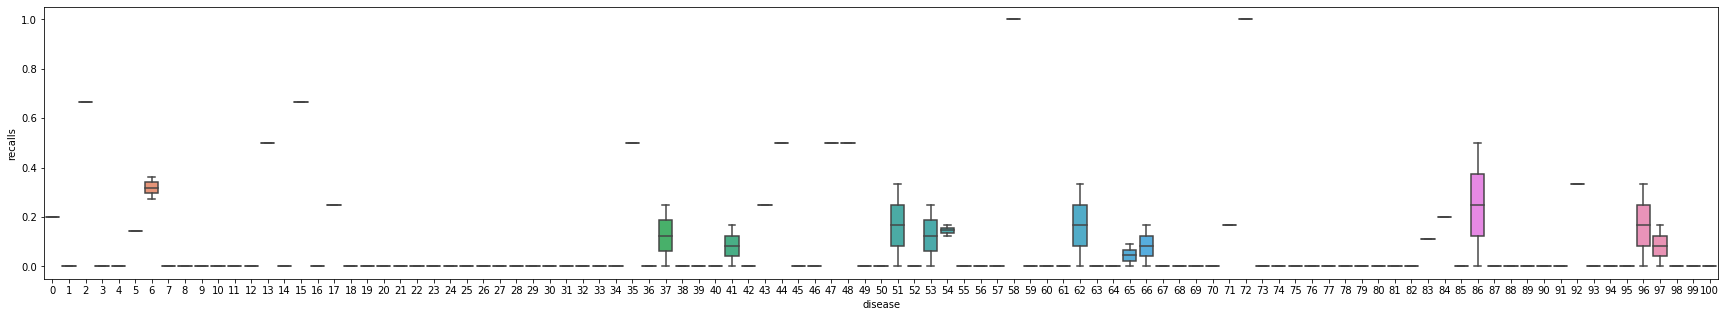

In [15]:
plt.figure(figsize=[30,5])
sns.boxplot(data=recalls_df, x='variable', y='value')
plt.ylabel('recalls')
plt.xlabel('disease')

Text(0.5, 0, 'disease')

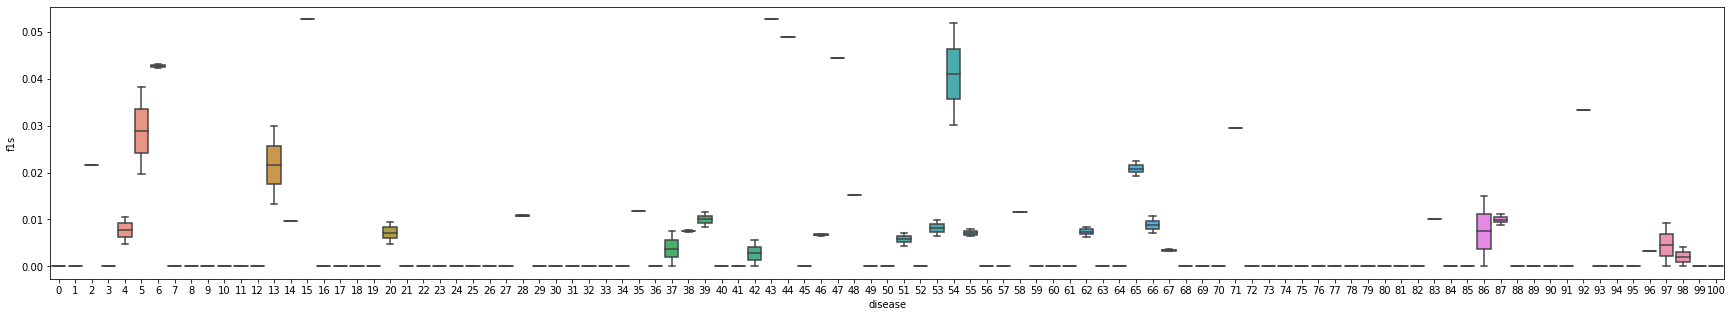

In [16]:
plt.figure(figsize=[30,5])
sns.boxplot(data=f1s_df, x='variable', y='value')
plt.ylabel('f1s')
plt.xlabel('disease')